# Importaciones

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar Datos Historicos

In [2]:
def get_dataframes():
    dataframes = []
    for file in os.listdir("data"):
        if file.endswith(".csv"):
            dataframes.append(pd.read_csv("data/"+file,delimiter=",", index_col=False))
    return dataframes

# Unir Datos Historicos

In [3]:
datos  = get_dataframes()
DF = pd.concat(datos, axis=0)

# Limpiar los datos

In [4]:
nuevos_nombres = [
    "Fecha(yyyy-mm-dd)",
    "Hora(hh:mm:ss)", 
    "Temperatura(℃)", 
    "Humedad(%)", 
    "Dirección del viento(°)", 
    "Velocidad del viento(m/s)", 
    "Presión barométrica(hPa)", 
    "Precipitación(mm)", 
    "Batería (%)"
]

df = DF["Tiempo"].str.split(" ", expand=True)
DF.drop(columns=["Tiempo"], inplace=True)

df.columns = ["Fecha", "Hora"]

columnas_numericas = DF.columns

for columna in columnas_numericas:
    DF[columna] = DF[columna].astype(str).str.replace(r"[^\d.]", "", regex=True)
    DF[columna] = pd.to_numeric(DF[columna], errors="coerce")

DF = pd.concat([df, DF], axis=1)
DF.columns = nuevos_nombres

# Mostrar datos.

In [5]:
DF

,Fecha(yyyy-mm-dd),Hora(hh:mm:ss),Temperatura(℃),Humedad(%),Dirección del viento(°),Velocidad del viento(m/s),Presión barométrica(hPa),Precipitación(mm),Batería (%)
0,2024-05-18,00:14:47,29.2,78.5,25.0,0.7,1002.7,0.0,98
1,2024-05-18,00:29:46,29.2,79.0,60.9,1.7,1002.7,0.0,98
2,2024-05-18,00:44:46,29.1,79.5,74.9,2.3,1002.5,0.0,98
3,2024-05-18,00:59:46,29.0,79.5,19.9,1.3,1002.3,0.0,96
4,2024-05-18,01:14:46,29.0,80.0,53.3,0.9,1002.4,0.0,96
...,...,...,...,...,...,...,...,...,...
8229,2025-02-14,22:51:36,19.2,85.5,99.9,1.7,1013.6,0.0,100
8230,2025-02-14,23:06:35,19.3,86.0,66.4,1.5,1013.7,0.0,98
8231,2025-02-14,23:21:35,19.4,86.0,96.3,1.5,1013.6,0.0,98
8232,2025-02-14,23:36:35,19.4,85.5,72.6,1.6,1013.5,0.0,98


# Generar Graficos de las Columnas Numericas

In [6]:
def Generar_grafico(titulo):
    ARRAY = np.array(DF[titulo])
    ARRAY = ARRAY[~np.isnan(ARRAY)] 

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(ARRAY, bins=30, kde=True, color='skyblue')
    plt.axvline(np.mean(ARRAY), color='red', linestyle='dashed', linewidth=2, label=f'{titulo} Promedio: {np.mean(ARRAY):.2f}')  
    plt.axvline(np.median(ARRAY), color='green', linestyle='dashed', linewidth=2, label=f'Mediana: {np.median(ARRAY):.2f}') 
    plt.xlabel(titulo)
    plt.ylabel("Frecuencia")
    plt.title(f"Histograma de {titulo}")
    plt.legend()

    plt.subplot(1, 2, 2)
    sns.boxplot(x=ARRAY, color='lightcoral')
    plt.xlabel(titulo)
    plt.title(f"Boxplot de {titulo}")

    plt.tight_layout()
    plt.show()

    print("Promedio:", np.mean(DF[titulo]))
    print("Total de valores:", np.count_nonzero(DF[titulo]))
    print("Desviación Estandar:", np.std(DF[titulo]))

    ARRAY = np.array(DF[titulo])
    ARRAY = ARRAY[~np.isnan(ARRAY)] 
    print("Mediana:", np.median(ARRAY))
    print("Varianza:", np.var(ARRAY))
    print("Moda:", np.argmax(np.bincount(ARRAY.astype(int))))
    print("Valor Máximo:", np.max(ARRAY))
    print("Valor Mínimo:", np.min(ARRAY))
    print("Rango:", np.max(ARRAY) - np.min(ARRAY))
    print("Percentil 25:", np.percentile(ARRAY, 25))
    print("Percentil 50:", np.percentile(ARRAY, 50))
    print("Percentil 75:", np.percentile(ARRAY, 75))
    print("Percentil 100:", np.percentile(ARRAY, 100))
    print("Percentil 0:", np.percentile(ARRAY, 0))
    print("Percentil 99:", np.percentile(ARRAY, 99))
    print("Percentil 80:", np.percentile(ARRAY, 80))

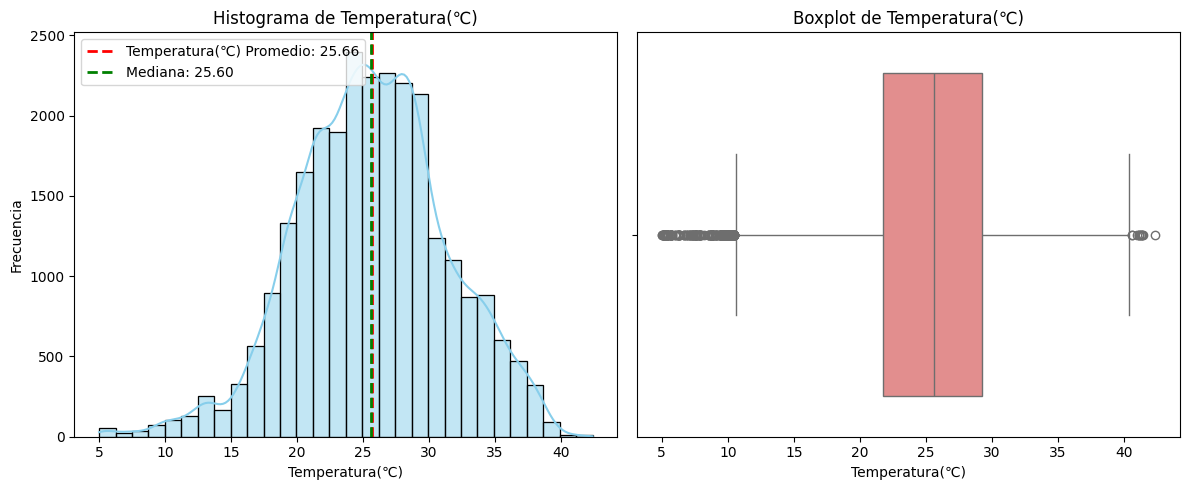

Promedio: 25.65674245020755
Total de valores: 32888
Desviación Estandar: 5.7007270017714236
Mediana: 25.6
Varianza: 32.4982883487258
Moda: 25
Valor Máximo: 42.4
Valor Mínimo: 5.0
Rango: 37.4
Percentil 25: 21.8
Percentil 50: 25.6
Percentil 75: 29.3
Percentil 100: 42.4
Percentil 0: 5.0
Percentil 99: 38.0
Percentil 80: 30.3


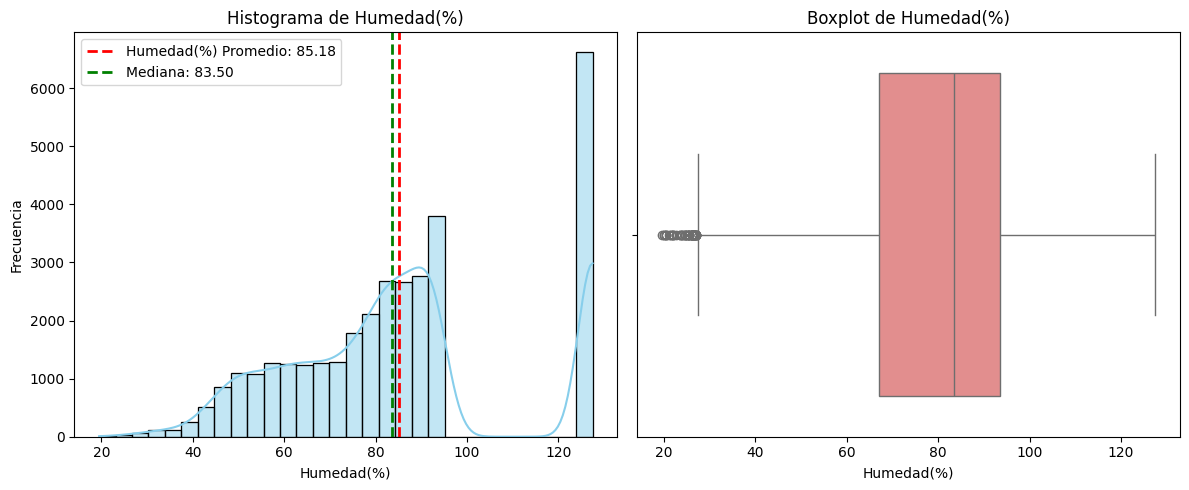

Promedio: 85.1783477256142
Total de valores: 32888
Desviación Estandar: 25.524236346404546
Mediana: 83.5
Varianza: 651.486641067119
Moda: 127
Valor Máximo: 127.5
Valor Mínimo: 19.5
Rango: 108.0
Percentil 25: 67.0
Percentil 50: 83.5
Percentil 75: 93.5
Percentil 100: 127.5
Percentil 0: 19.5
Percentil 99: 127.5
Percentil 80: 127.5


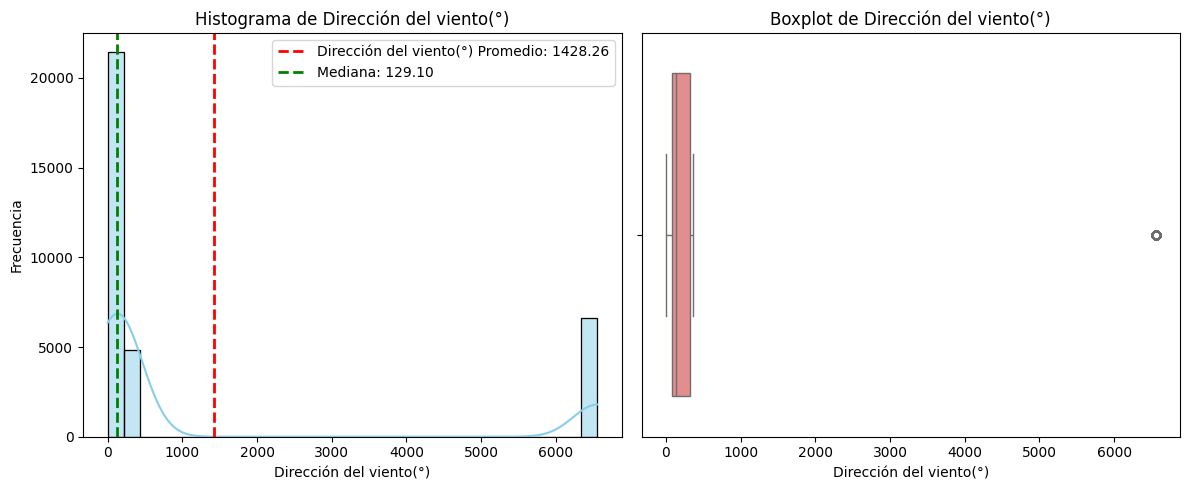

Promedio: 1428.2599793237653
Total de valores: 32884
Desviación Estandar: 2576.3379846586727
Mediana: 129.1
Varianza: 6637517.4111951105
Moda: 6553
Valor Máximo: 6553.5
Valor Mínimo: 0.0
Rango: 6553.5
Percentil 25: 79.6
Percentil 50: 129.1
Percentil 75: 324.7
Percentil 100: 6553.5
Percentil 0: 0.0
Percentil 99: 6553.5
Percentil 80: 6553.5


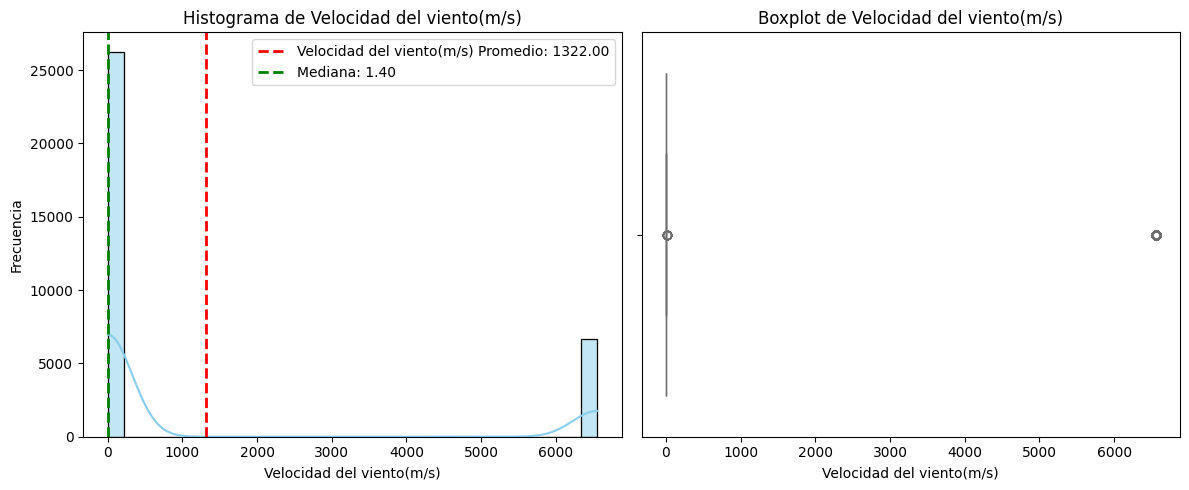

Promedio: 1322.0011828022382
Total de valores: 32851
Desviación Estandar: 2628.5187331884426
Mediana: 1.4
Varianza: 6909110.7307225745
Moda: 0
Valor Máximo: 6553.5
Valor Mínimo: 0.0
Rango: 6553.5
Percentil 25: 0.7
Percentil 50: 1.4
Percentil 75: 3.2
Percentil 100: 6553.5
Percentil 0: 0.0
Percentil 99: 6553.5
Percentil 80: 6553.5


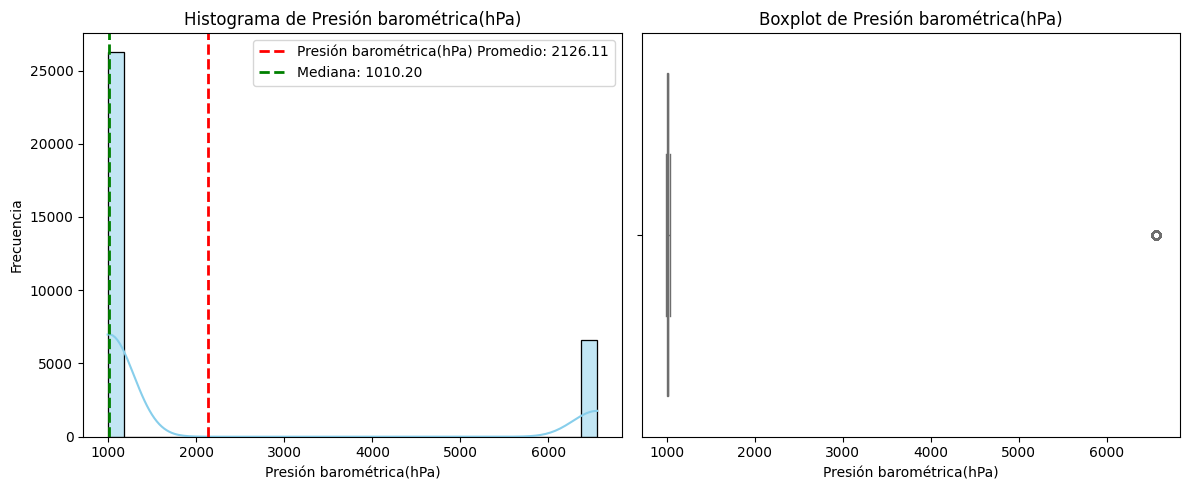

Promedio: 2126.110648260764
Total de valores: 32888
Desviación Estandar: 2224.507642992031
Mediana: 1010.2
Varianza: 4948434.253729961
Moda: 6553
Valor Máximo: 6553.5
Valor Mínimo: 991.2
Rango: 5562.3
Percentil 25: 1005.1
Percentil 50: 1010.2
Percentil 75: 1017.8
Percentil 100: 6553.5
Percentil 0: 991.2
Percentil 99: 6553.5
Percentil 80: 6553.5


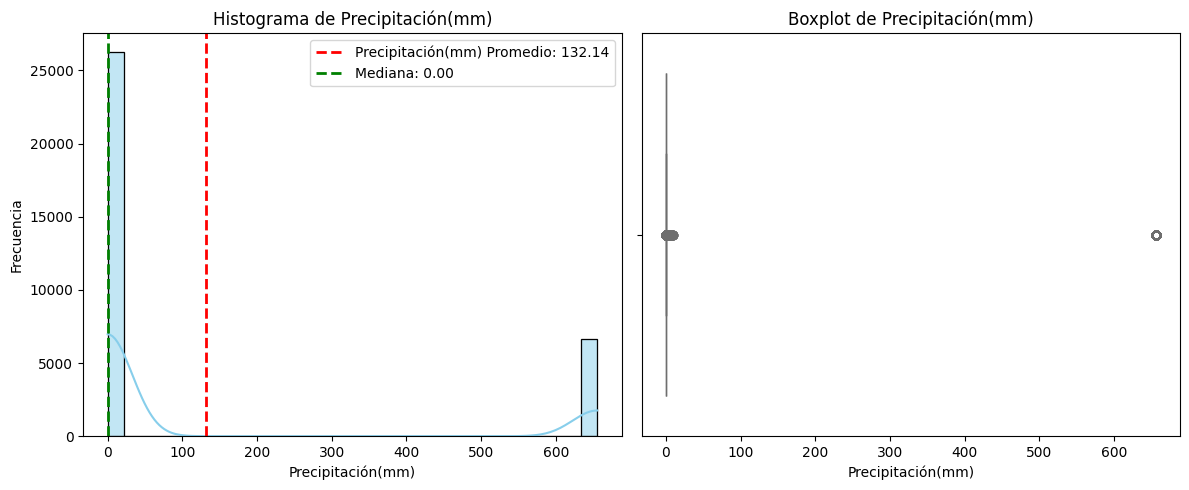

Promedio: 132.14281500851376
Total de valores: 11656
Desviación Estandar: 262.881022350389
Mediana: 0.0
Varianza: 69106.43191198572
Moda: 0
Valor Máximo: 655.35
Valor Mínimo: 0.0
Rango: 655.35
Percentil 25: 0.0
Percentil 50: 0.0
Percentil 75: 0.03
Percentil 100: 655.35
Percentil 0: 0.0
Percentil 99: 655.35
Percentil 80: 655.35


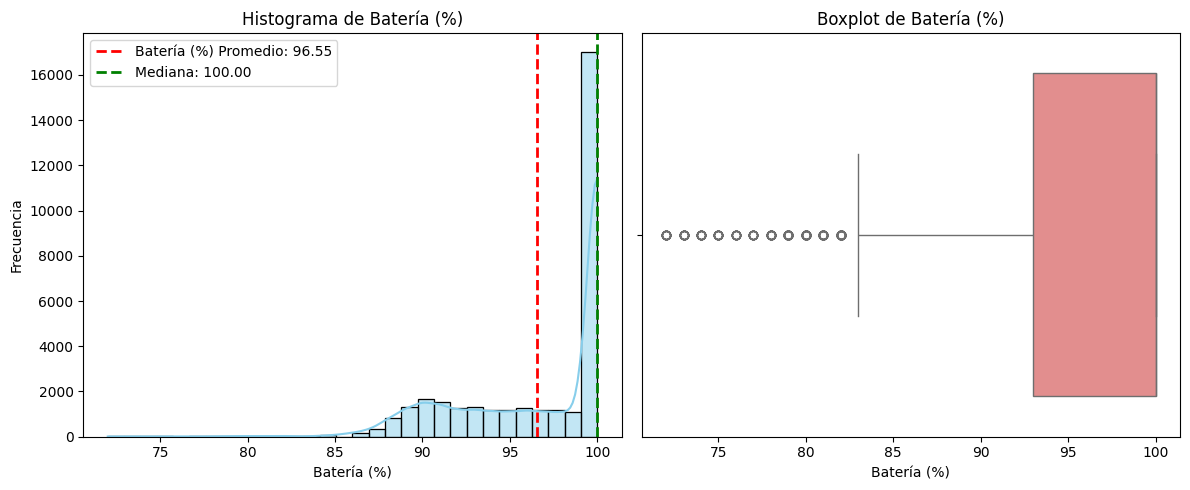

Promedio: 96.55166018000486
Total de valores: 32888
Desviación Estandar: 4.506010436983335
Mediana: 100.0
Varianza: 20.30413005820274
Moda: 100
Valor Máximo: 100
Valor Mínimo: 72
Rango: 28
Percentil 25: 93.0
Percentil 50: 100.0
Percentil 75: 100.0
Percentil 100: 100.0
Percentil 0: 72.0
Percentil 99: 100.0
Percentil 80: 100.0


In [7]:
for columna in DF.columns[2:]:
    Generar_grafico(columna)
